# Import the library

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Import Dataset and Analysis

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()

In [20]:
digits.data.shape

(1797, 64)

In [21]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [22]:
import pandas as pd
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [23]:
df1 = df.dropna()
df1

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [24]:
digits.images[9]

array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
       [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
       [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]])

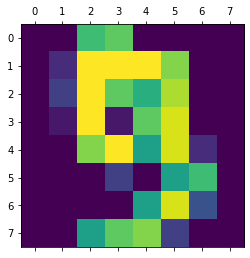

In [25]:
plt.matshow(digits.images[9]) 

In [26]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Splitting the Dataset

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [28]:
X_train.shape

(1257, 64)

In [29]:
y_train.shape

(1257,)

In [30]:
X_test.shape

(540, 64)

In [31]:
y_test.shape

(540,)

# Applying 3 Models

### Logistic Regression

In [32]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9648148148148148

In [33]:
y_predicted_lr = lr.predict(X_test)

In [34]:
print(classification_report(y_test, y_predicted_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       0.92      0.96      0.94        56
           2       0.96      1.00      0.98        50
           3       0.96      0.94      0.95        50
           4       0.98      0.98      0.98        50
           5       0.96      0.93      0.94        55
           6       0.96      1.00      0.98        55
           7       0.98      0.98      0.98        54
           8       0.94      0.91      0.92        53
           9       0.98      0.95      0.96        56

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.96       540



<h4>Confusion Matrix</h4>

In [35]:
cm = confusion_matrix(y_test, y_predicted_lr)
cm

array([[61,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  1,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 47,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 49,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 51,  2,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 53,  0,  0],
       [ 0,  4,  1,  0,  0,  0,  0,  0, 48,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 53]])

Text(69.0, 0.5, 'Truth')

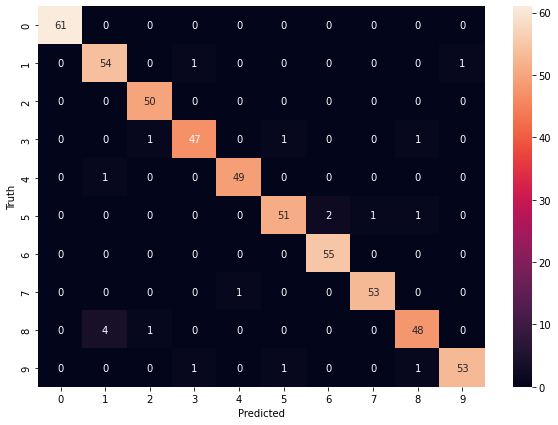

In [36]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Decision Tree

In [37]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.8666666666666667

In [38]:
y_predicted_dt = dt.predict(X_test)

In [39]:
print(classification_report(y_test, y_predicted_dt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        61
           1       0.86      0.86      0.86        56
           2       0.82      0.92      0.87        50
           3       0.81      0.86      0.83        50
           4       0.81      0.86      0.83        50
           5       0.88      0.82      0.85        55
           6       0.91      0.96      0.94        55
           7       0.89      0.87      0.88        54
           8       0.95      0.74      0.83        53
           9       0.79      0.80      0.80        56

    accuracy                           0.87       540
   macro avg       0.87      0.87      0.86       540
weighted avg       0.87      0.87      0.87       540



<h4>Confusion Matrix</h4>

In [40]:
cm = confusion_matrix(y_test, y_predicted_dt)
cm

array([[59,  0,  1,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 48,  0,  2,  1,  1,  0,  0,  2,  2],
       [ 0,  1, 46,  2,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 43,  0,  1,  1,  2,  0,  2],
       [ 0,  1,  0,  1, 43,  0,  3,  2,  0,  0],
       [ 0,  2,  0,  0,  4, 45,  1,  0,  0,  3],
       [ 0,  0,  0,  0,  2,  0, 53,  0,  0,  0],
       [ 1,  0,  2,  1,  1,  0,  0, 47,  0,  2],
       [ 0,  1,  6,  2,  0,  1,  0,  1, 39,  3],
       [ 2,  3,  0,  2,  1,  2,  0,  1,  0, 45]])

Text(69.0, 0.5, 'Truth')

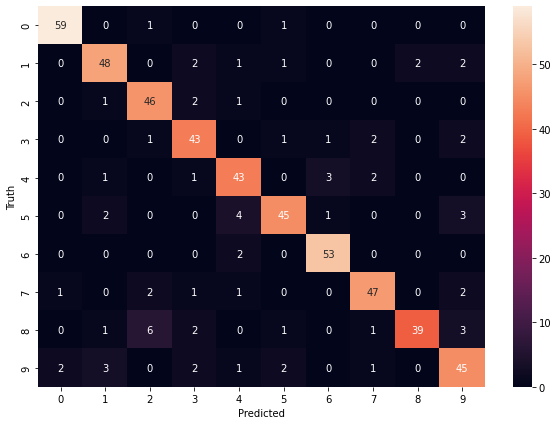

In [41]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Random Forest

In [42]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9685185185185186

In [43]:
y_predicted_rf = rf.predict(X_test)

In [44]:
print(classification_report(y_test, y_predicted_rf))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       0.97      1.00      0.98        56
           2       0.94      0.98      0.96        50
           3       1.00      0.96      0.98        50
           4       0.96      1.00      0.98        50
           5       0.96      0.91      0.93        55
           6       0.98      1.00      0.99        55
           7       0.98      1.00      0.99        54
           8       0.92      0.92      0.92        53
           9       0.98      0.93      0.95        56

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



<h4>Confusion Matrix</h4>

Text(69.0, 0.5, 'Truth')

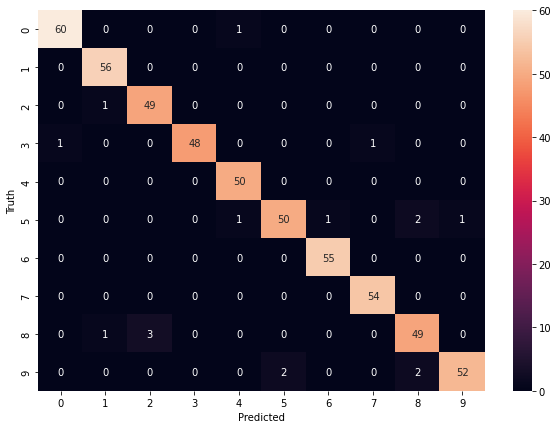

In [45]:
cm = confusion_matrix(y_test, y_predicted_rf)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')